In [1]:
using FUSE
using IMAS
using Plots;
FUSE.logging(Logging.Info);

In [2]:
load_dir = "/fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/playground/weisberg_FPP_opt/very_exploratory/opt_FPP_Solovev_Kr_HTS0.1_AspectRatio_fk0.88_fLH_ECaccess_qpol2.5/opt_runs/2023-06-05T16:27:22.052__2437505"
#load_dir = "/fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/playground/weisberg_FPP_opt/nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_ds0.9/opt_runs/2023-06-11T21:59:16.526__1353245"
#load_dir = "/fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/playground/weisberg_FPP_opt/nominal/opt_betaN_cost__TEQUILA_Kr_flattop48_HTS0.1_qpol2.75_ds0.9/opt_runs/2023-06-12T09:17:55.808__2824312"
ini = FUSE.json2ini(joinpath(load_dir, "ini.json"))
act = FUSE.json2act(joinpath(load_dir, "act.json"))
dd0 = IMAS.json2imas(joinpath(load_dir, "dd.json"));

┌ Error: reading act.ActorDivertors.impurities : TypeError(:setfield!, "", Union{Missing, Vector{Symbol}}, Float64[])
└ @ SimulationParameters ~/.julia/dev/SimulationParameters/src/utils.jl:92


In [3]:
#ini.build.symmetric = false
#ini.core_profiles.T_ratio = 0.825

ini.equilibrium.ip = 8e6
ini.equilibrium.pressure_core = 0.6e6
ini

FUSE.ParametersInits{Float64}
├─ general
│  ├─ casename ➡ "FPP_v1_demount_scalars" Mnemonic name of the case being run
│  └─ init_from ➡ :scalars Initialize run from [:ods, :scalars]
├─ gasc
│  ├─ filename ➡ missing Output GASC .json file from which data will be loaded
│  └─ case ➡ missing Number of the GASC run to load
├─ ods
│  └─ filename ➡ missing ODS.json file from which equilibrium is loaded
├─ build
│  ├─ layers ➡ OrderedCollections.OrderedDict{Symbol, Float64}(
│  │           :gap_OH => 1.180137712438599
│  │           :OH => 0.35554973675585266
│  │           :gap_TF_OH => 0.068920461457739
│  │           :hfs_TF => 0.3074802716013343
│  │           :hfs_gap_low_temp_shield_TF => 0.06892046145773922
│  │           :hfs_low_temp_shield => 0.4241901854016936
│  │           :hfs_gap_vacuum_vessel_low_temp_shield => 0.06892046145773945
│  │           :hfs_vacuum_vessel => 0.17230115364434795
│  │           :hfs_gap_high_temp_shield_vacuum_vessel => 0.06892046145773945
│  │        

## Run with CHEASE

In [4]:
#act.ActorCXbuild.rebuild_wall = false
act.ActorEquilibriumTransport.do_plot = true
act.ActorEquilibrium.model = :CHEASE
act.ActorEquilibriumTransport.max_iter = 5
act.ActorCXbuild.rebuild_wall = true
act.ActorCHEASE.free_boundary = true
act.ActorCHEASE

ActorCHEASE{Float64}
├─ free_boundary ➡ true Convert fixed boundary equilibrium to free boundary one
├─ clear_workdir ➡ true Clean the temporary workdir for CHEASE
└─ rescale_eq_to_ip ➡ true Scale equilibrium to match Ip


In [5]:
dd = IMAS.dd();
FUSE.init(dd, ini, act);

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 6.94 [m]                  B0 → 5.13 [T]                  Te0 → 11.8 [keV]               ne0 → 9.83e+19 [m⁻³]           
a → 1.95 [m]                   ip → 8.02 [MA]                 Ti0 → 14.3 [keV]               ne_ped → 4.88e+19 [m⁻³]        
1/ϵ → 3.55 [m]                 q95 → 6.39                     <Te> → 5.52 [keV]              <ne> → 6.75e+19 [m⁻³]          
κ → 2.15                       <Bpol> → 0.49 [T]              <Ti> → 6.69 [keV]              ne0/<ne> → 1.46                
δ → 0.678                      βpol → 1.51                    Te0/<Te> → 2.13                fGW → 1.19                     
ζ → -0.0403                    βtor → 0.0142                  Ti0/<Ti> → 2.13                zeff_ped → 1.93                


​


24×9 DataFrame
 Row │ group   details     type      ΔR         R_start   R_end     material      area        volume    
     │ String  String      String    Float64    Float64   Float64   String        Float64     Float64   
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                            1.65617     0.0       1.65617                 27.0787     140.891
   2 │ in                  oh        0.498969    1.65617   2.15514  ReBCO           8.15823     97.6834
   3 │ in                            0.0967211   2.15514   2.25186                  1.58141     21.8946
   4 │ hfs                 tf        0.43151     2.25186   2.68337  ReBCO          18.5566     312.867
   5 │ hfs                           0.0967211   2.68337   2.78009                  5.65383    289.318
   6 │ hfs     low temp    shield    0.595297    2.78009   3.37539  Steel          23.1914     998.066
   7 │ hfs                           0.0967211   3

​


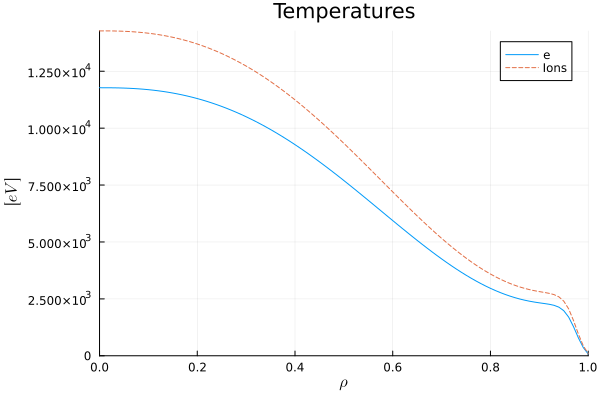

​


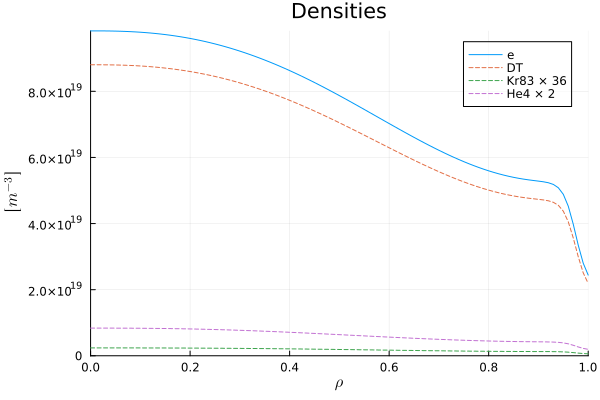

​


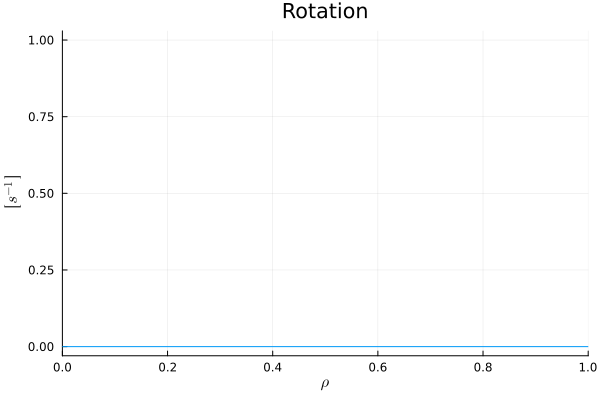

​


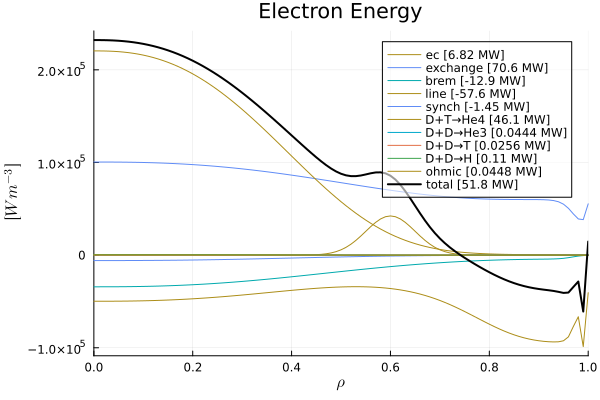

​


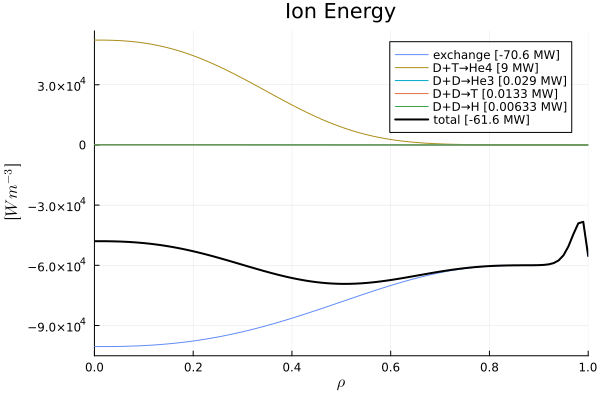

​


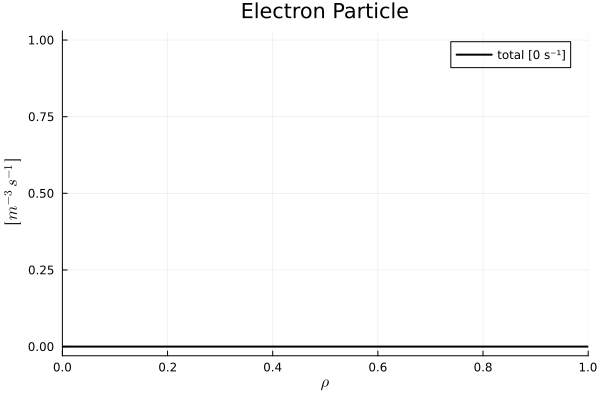

​


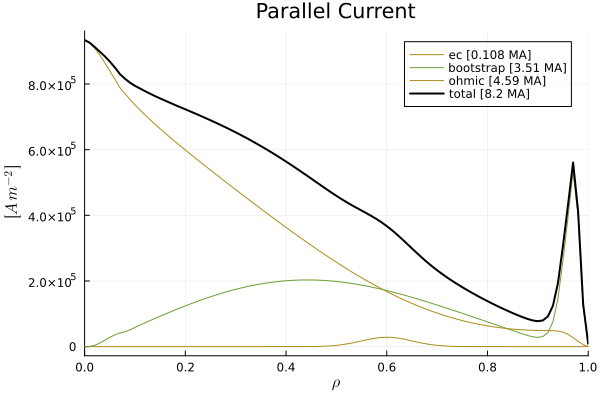

In [6]:
FUSE.digest(dd);

[ Info: Iteration = 1 , convergence error = 0.764, threshold = 0.05
[ Info: Iteration = 2 , convergence error = 0.173, threshold = 0.05
[ Info: Iteration = 3 , convergence error = 0.034, threshold = 0.05


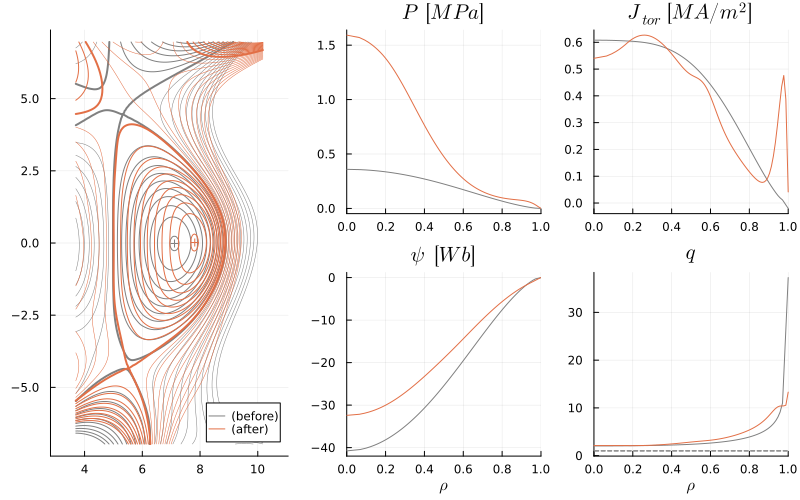

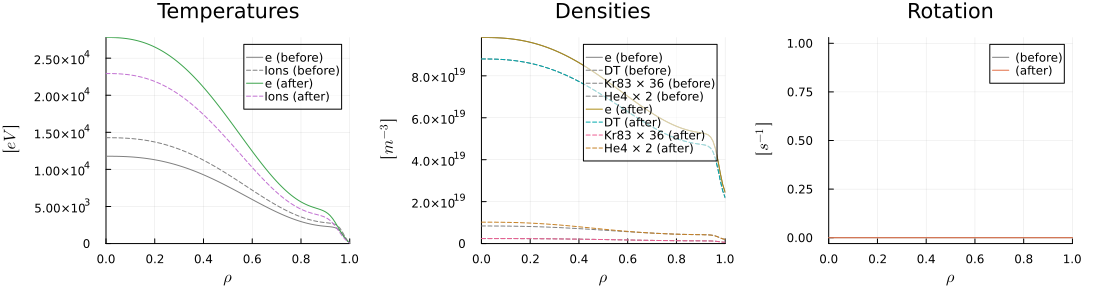

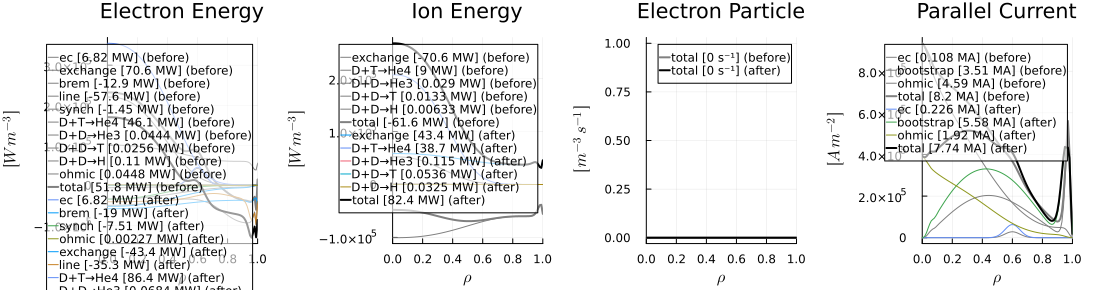

In [7]:
FUSE.ActorEquilibriumTransport(dd, act);

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 6.94 [m]                  B0 → 5.13 [T]                  Te0 → 27.8 [keV]               ne0 → 9.83e+19 [m⁻³]           
a → 1.95 [m]                   ip → 7.92 [MA]                 Ti0 → 22.9 [keV]               ne_ped → 4.88e+19 [m⁻³]        
1/ϵ → 3.55 [m]                 q95 → 9.68                     <Te> → 11.8 [keV]              <ne> → 6.75e+19 [m⁻³]          
κ → 2.15                       <Bpol> → 0.484 [T]             <Ti> → 9.74 [keV]              ne0/<ne> → 1.46                
δ → 0.678                      βpol → 4.36                    Te0/<Te> → 2.36                fGW → 1.19                     
ζ → -0.0403                    βtor → 0.0407                  Ti0/<Ti> → 2.36                zeff_ped → 1.93                


​


24×9 DataFrame
 Row │ group   details     type      ΔR         R_start   R_end     material      area        volume    
     │ String  String      String    Float64    Float64   Float64   String        Float64     Float64   
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                            1.65617     0.0       1.65617                 27.0787     140.891
   2 │ in                  oh        0.498969    1.65617   2.15514  ReBCO           8.15823     97.6834
   3 │ in                            0.0967211   2.15514   2.25186                  1.58141     21.8946
   4 │ hfs                 tf        0.43151     2.25186   2.68337  ReBCO          18.5566     312.867
   5 │ hfs                           0.0967211   2.68337   2.78009                  5.65383    289.318
   6 │ hfs     low temp    shield    0.595297    2.78009   3.37539  Steel          23.1914     998.066
   7 │ hfs                           0.0967211   3

​


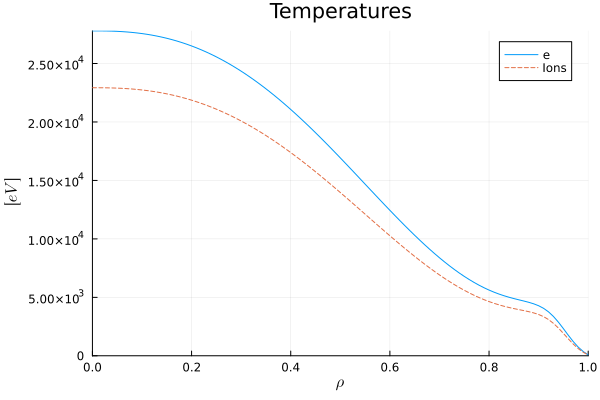

​


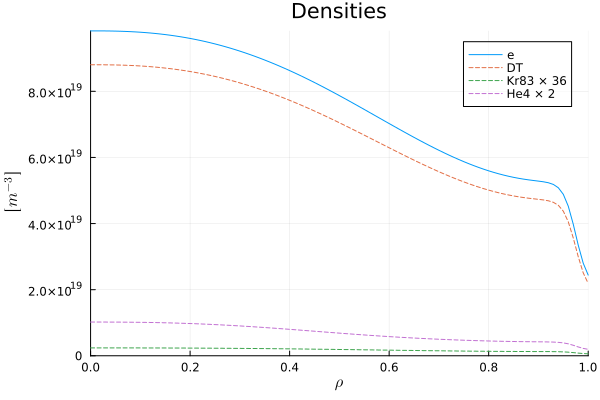

​


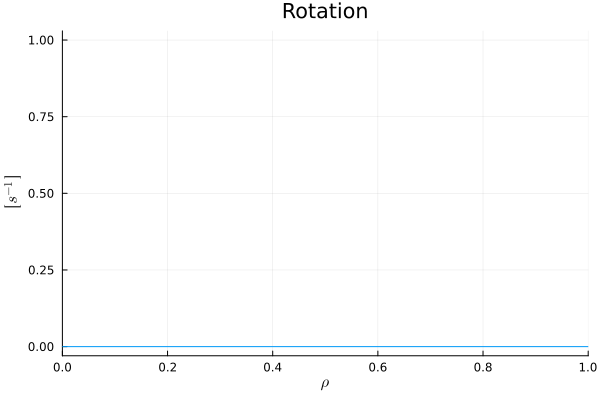

​


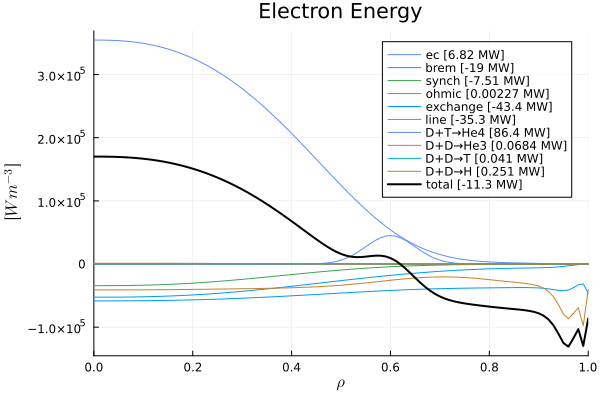

​


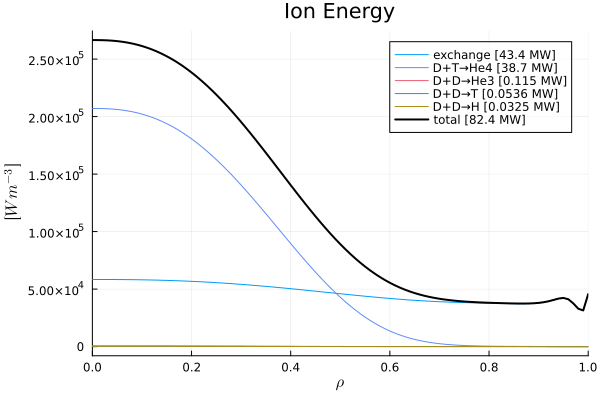

​


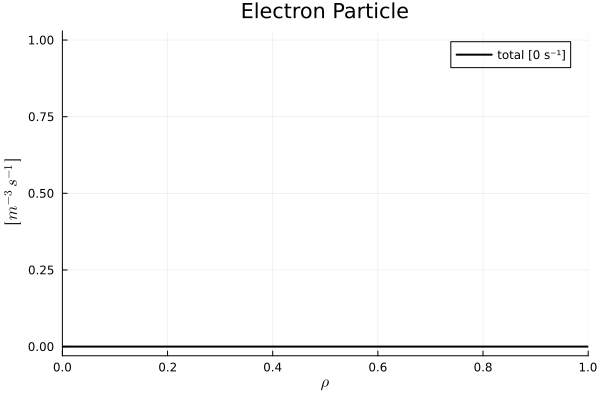

​


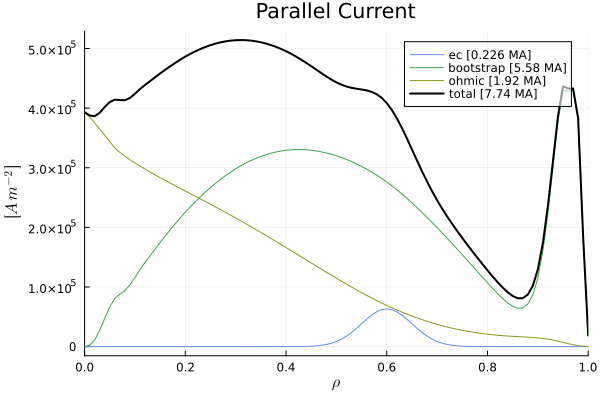

In [8]:
FUSE.digest(dd)

## Run with TEQUILA

In [4]:
#act.ActorCXbuild.rebuild_wall = false
act.ActorEquilibriumTransport.do_plot = true
act.ActorEquilibrium.model = :TEQUILA
act.ActorEquilibriumTransport.max_iter = 5
act.ActorCXbuild.rebuild_wall = true
act.ActorCHEASE.free_boundary = true
act.ActorTEQUILA

ActorTEQUILA{Float64}
├─ free_boundary ➡ true Convert fixed boundary equilibrium to free boundary one
├─ number_of_radial_grid_points ➡ 20 Number of TEQUILA radial grid points
├─ number_of_fourier_modes ➡ 20 Number of modes for Fourier decomposition
├─ number_of_MXH_harmonics ➡ 10 Number of Fourier harmonics in MXH representation of flux surfaces
├─ number_of_iterations ➡ 20 Number of TEQUILA iterations
├─ relax ➡ 1.0 Relaxation on the Picard iterations
├─ tolerance ➡ 1.0e-6 Tolerance for terminating iterations
├─ psi_norm_boundary_cutoff ➡ 0.999 Cutoff psi_norm for determining boundary
├─ do_plot ➡ false Plot before and after actor
└─ debug ➡ false Print debug information withing TEQUILA solve


In [5]:
dd = IMAS.dd();
FUSE.init(dd, ini, act);

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 6.94 [m]                  B0 → 5.13 [T]                  Te0 → 19.7 [keV]               ne0 → 9.84e+19 [m⁻³]           
a → 1.95 [m]                   ip → 7.98 [MA]                 Ti0 → 23.8 [keV]               ne_ped → 4.86e+19 [m⁻³]        
1/ϵ → 3.55 [m]                 q95 → 6.79                     <Te> → 8.77 [keV]              <ne> → 6.76e+19 [m⁻³]          
κ → 2.15                       <Bpol> → 0.488 [T]             <Ti> → 10.6 [keV]              ne0/<ne> → 1.46                
δ → 0.678                      βpol → 2.47                    Te0/<Te> → 2.24                fGW → 1.2                      
ζ → -0.0403                    βtor → 0.0238                  Ti0/<Ti> → 2.24                zeff_ped → 1.93                


​


24×9 DataFrame
 Row │ group   details     type      ΔR         R_start   R_end     material      area        volume    
     │ String  String      String    Float64    Float64   Float64   String        Float64     Float64   
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                            1.65617     0.0       1.65617                 26.2904     136.79
   2 │ in                  oh        0.498969    1.65617   2.15514  ReBCO           7.92073     94.8397
   3 │ in                            0.0967211   2.15514   2.25186                  1.53537     21.2572
   4 │ hfs                 tf        0.43151     2.25186   2.68337  ReBCO          18.1207     305.518
   5 │ hfs                           0.0967211   2.68337   2.78009                  5.49317    283.224
   6 │ hfs     low temp    shield    0.595297    2.78009   3.37539  Steel          22.5944     981.111
   7 │ hfs                           0.0967211   3.

​


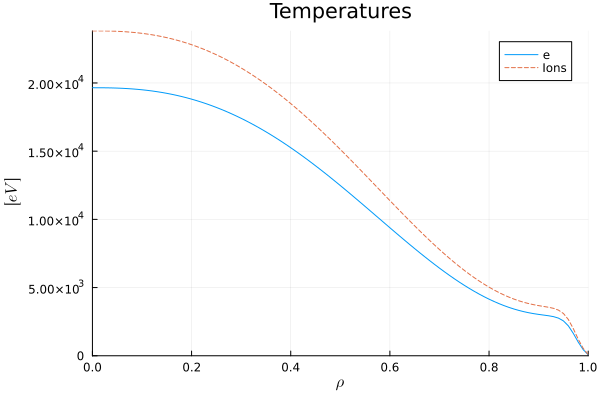

​


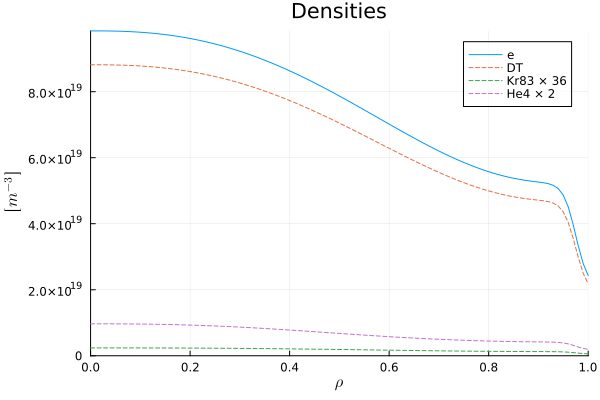

​


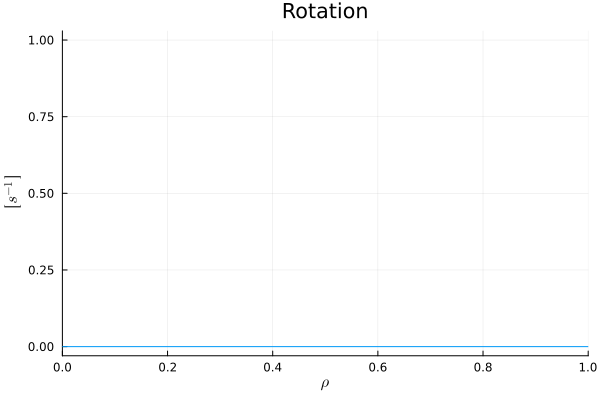

​


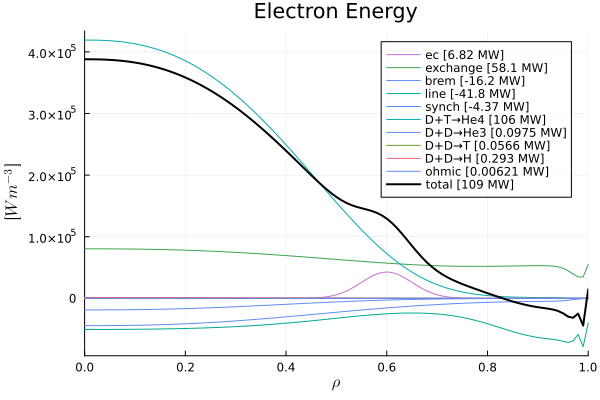

​


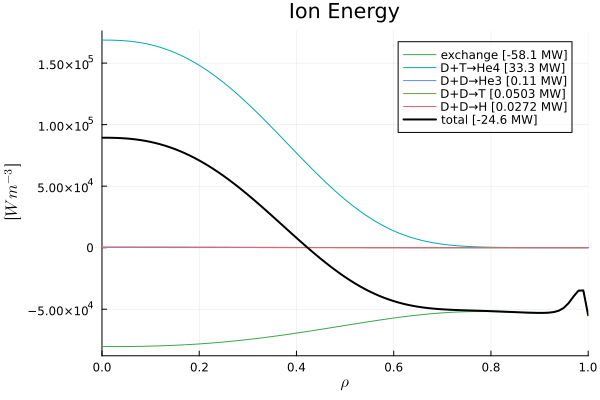

​


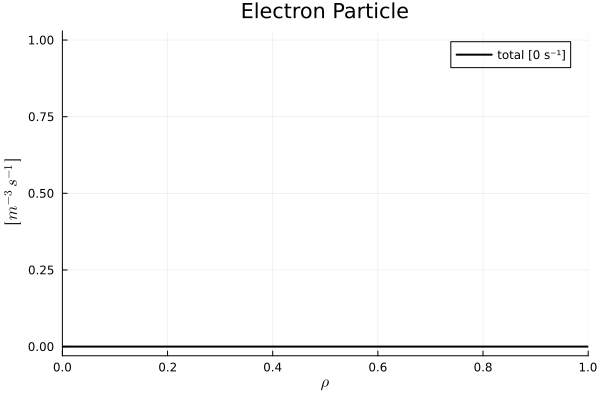

​


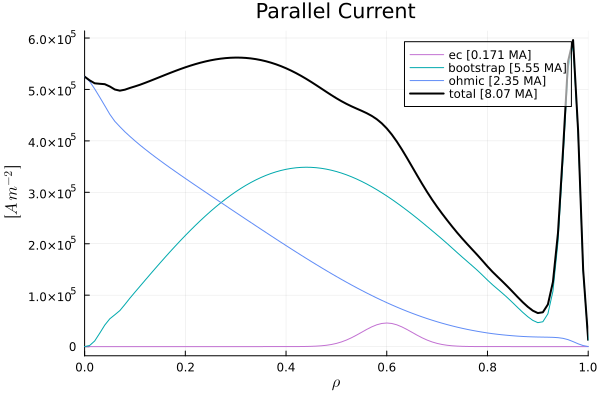

In [6]:
FUSE.digest(dd);

In [ ]:
FUSE.ActorEquilibriumTransport(dd, act);

In [ ]:
FUSE.digest(dd);

## Check constraint calculations

In [ ]:
OFL = deepcopy(FUSE.ObjectiveFunctionsLibrary)
CFL = deepcopy(FUSE.ConstraintFunctionsLibrary)
display(OFL)
display(CFL)

In [ ]:
dd0.requirements.ds03 = 0.9
ds03 = (IMAS.tau_e_thermal(dd0.core_profiles.profiles_1d[], dd0.core_sources)/ IMAS.tau_e_ds03(dd0))

display(ds03)
display((ds03 - 0.9)/0.9)
CFL[:max_ds03](dd0)

In [ ]:
dd0.requirements.q_pol_omp = 3e9
display(IMAS.q_pol_omp_eich(dd0))
CFL[:max_qpol_omp](dd0)

In [ ]:
ωpe_ωce = IMAS.ω_pe(@ddtime(dd0.summary.local.magnetic_axis.n_e.value)) / IMAS.ω_ce(@ddtime(dd0.summary.global_quantities.b0.value))
ωpe_ωce2 = 89.9 .* (@ddtime(dd0.summary.local.magnetic_axis.n_e.value)/1e20).^0.5 ./ (28.0 .* @ddtime(dd0.summary.global_quantities.b0.value))

display(ωpe_ωce)
display(ωpe_ωce2)
CFL[:max_ωpe_ωce](dd0)

In [ ]:
dd0.requirements.lh_power_threshold_fraction = 1.0

Psol = IMAS.power_sol(dd0)
PLH = IMAS.scaling_L_to_H_power(dd0)

a = (IMAS.power_sol(dd0) / dd0.requirements.lh_power_threshold_fraction - IMAS.scaling_L_to_H_power(dd0)) / IMAS.scaling_L_to_H_power(dd0)

display(Psol)
display(PLH)
display(Psol/PLH)
display(a)

CFL[:min_lh_power_threshold](dd0)

